In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
data = pd.read_csv('../Measurements/tracking_latency/s04_210318.csv')

set the starting time of the receording to 0

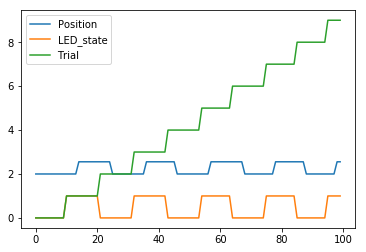

In [215]:
data[['Position', 'LED_state', 'Trial']][:100].plot()

In [216]:
data.Time -= data.Time.min()
data.Time *= 1000

In [217]:
data.Time.max() / 1000

227.35554178777738

In [218]:
data.index = data.Time # change time to ms

In [219]:
# data

In [220]:
data['TrialTime'] = data.groupby('Trial').Time.apply(lambda x: x-x.min())

In [221]:
# data.TrialTime[data.Trial == 20]

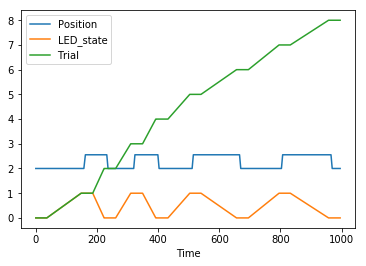

In [222]:
data[['Position', 'LED_state', 'Trial']][:1000].plot()

Bring down the positon value to zero

In [223]:
data.Position -= data.Position.min()

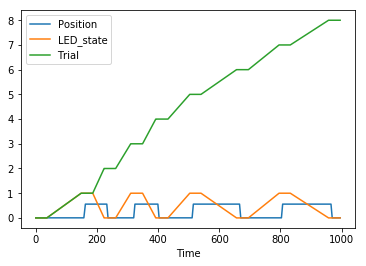

In [224]:
data[['Position', 'LED_state', 'Trial']][:1000].plot()

Make the position values between 0 and 5

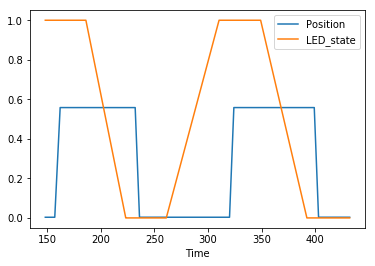

In [225]:
data[['Position', 'LED_state']][40:450].plot()

c:\users\sirotalab\miniconda3\envs\vrlatency\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


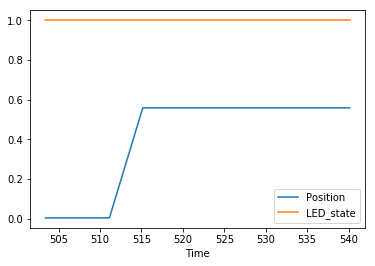

In [226]:
data[data.Trial == 5].plot(y=['Position', 'LED_state'])

In [227]:
threshold = (data.Position.max() - data.Position.min()) / 2 
threshold

0.2807965129613874

In [228]:
data['FrameOn'] = data['Position'] > threshold

In [229]:
# trial_no = 6
# data[data.Trial == trial_no].plot(y=['Position', 'LED_state'])
# data.FrameOn[data.Trial == trial_no]

In [230]:
resp_on = data[((data['LED_state'] == 0) & (data['FrameOn'] == False)) | ((data['LED_state'] == 1) & (data['FrameOn'] == True))]

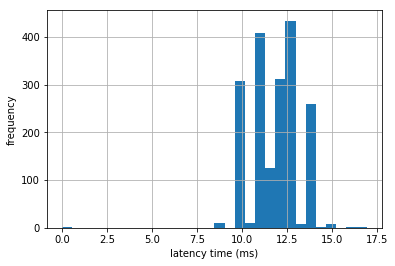

In [231]:
latency = resp_on.groupby('Trial').TrialTime.min()
(latency).hist(bins=30).set(xlabel='latency time (ms)', ylabel='frequency')
plt.show()

In [232]:
import seaborn as sns

[(0, 60)]

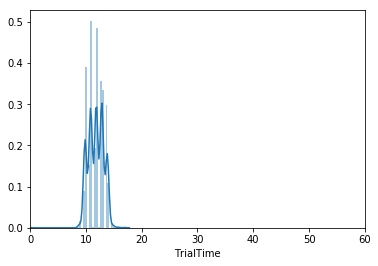

In [233]:
sns.distplot(latency).set(xlim=[0, 60])

# script

In [278]:
fname = 's16_210318'

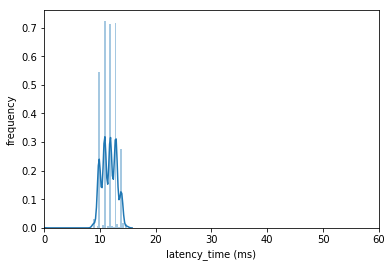

In [279]:
# import data
data = pd.read_csv('../Measurements/tracking_latency/' + fname + '.csv')

data.Time -= data.Time.min()
data.Time *= 1000
data.index = data.Time # change time to ms

# data processing
data['TrialTime'] = data.groupby('Trial').Time.apply(lambda x: x-x.min())
data.Position -= data.Position.min()
threshold = (data.Position.max() - data.Position.min()) / 2
data['FrameOn'] = data['Position'] > threshold

resp_on = data[((data['LED_state'] == 0) & (data['FrameOn'] == False)) | ((data['LED_state'] == 1) & (data['FrameOn'] == True))]
latency = resp_on.groupby('Trial').TrialTime.min()

sns.distplot(latency).set(xlim=[0, 60], xlabel='latency_time (ms)', ylabel='frequency')
plt.savefig('../Figures/tracking_latency/' + fname + '.png')